# TKT4108 Structural dynamics 2

## Solution Exercise 4

**Main topics:** Transmission of random variables, extreme response

**References:** Newland Chapter 6-7

**Hint**: Take a look at the examples posted on Github

### Problem 1: Transmission of random variables 

In this problem, we will consider the glulam truss displayed below. The truss carries the roof of an industrial building, and production equipment used in the factory is hanging down from the truss introducing a stochastic dynamic excitation. In this problem, we will asses the vibrations and the load effects caused by the two stochastic loads

<img src="truss.svg" width=100%>



The truss spans 14m, and the distance between the horizontal members is 1m from the centre to the centre of the two beams. The members have dimensions of 200x200mm. Assume a density of the material of $\rho=2000 k/m^3$. The density is higher than the gluelaminated timber since we have included mass from structural components that do not provide stiffness to the truss (the roof, secondary beams that supports the roof, and other installations)  




We will model the structure using bar elements with four degrees of freedom. The mass and stiffness matrix of the bar element in local coordinates are

$$ \mathbf{k} = \frac{EA}{L} \left[ \begin{array}{cccc} 1 & 0 & -1 & 0 \\ 0 & 0 & 0 & 0 \\  -1 & 0 & 1 & 0 \\  0 & 0 & 0 & 0       \end{array} \right] $$


$$ \mathbf{m} = \frac{\rho A L}{6} \left[ \begin{array}{cccc} 2 & 0 & 1 & 0 \\ 0 & 2 & 0 & 1 \\  1 & 0 & 2 & 0 \\  0 & 1 & 0 & 2       \end{array} \right] $$


a) Make a python script that creates the truss's mass and stiffness matrices and calculate the structure's natural frequencies and mode shapes. Plot the first two vibration modes

#### Solution

<Figure size 1000x1000 with 0 Axes>

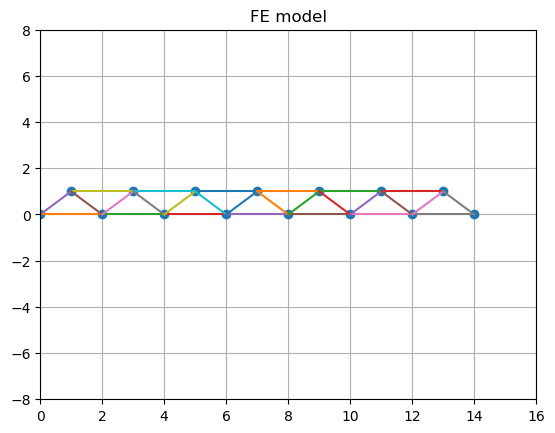

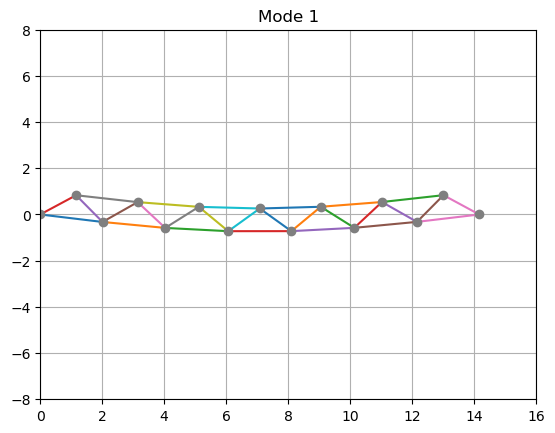

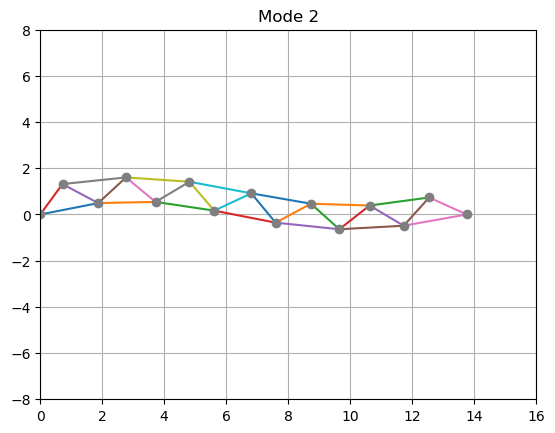

In [20]:
import numpy as np
from scipy import linalg as spla
from matplotlib import pyplot as plt
from time_integration import * # Import all functions in the module time_integration

# define bar element
def bar_element(E,A,rho,x1,x2):
    L = ((x2-x1) @ (x2-x1))**0.5
        
    k_local = E*A/L*np.array([[1, 0, -1, 0],[0, 0, 0, 0],[-1, 0, 1, 0],[0, 0, 0, 0]])
    m_local = rho*A*L/6*np.array([[2, 0, 1, 0],[0, 2, 0, 1],[1, 0, 2, 0],[0, 1, 0, 2]])
    
    e1 = (x2-x1)/L    
    e2 = np.cross(np.array([0, 0, 1]),np.append(e1,0))
    e2 = e2[0:-1]
    

    T_glob2loc = np.vstack((e1,e2))
    T_glob2loc_element = spla.block_diag(T_glob2loc,T_glob2loc)
    
     
    k_global = T_glob2loc_element.T @ k_local @ T_glob2loc_element
    m_global = T_glob2loc_element.T @ m_local @ T_glob2loc_element
    
    return L, k_global, m_global


# define nodes and elements

nodes = np.array([[1, 0, 0],
[2, 2, 0],
[3, 4, 0],
[4, 6, 0],
[5, 8, 0],
[6, 10, 0],
[7, 12, 0],
[8, 14, 0],
[9, 1, 1],
[10, 3, 1],
[11, 5, 1],
[12, 7, 1],
[13, 9, 1],
[14, 11, 1],
[15, 13, 1]],dtype=float)

elements = np.array([[1, 1, 2, 1],
[2, 2, 3, 1],
[3, 3, 4, 1],
[4, 4, 5, 1],
[5, 5, 6, 1],
[6, 6, 7, 1],
[7, 7, 8, 1],
[8, 9, 10, 1],
[9, 10, 11, 1],
[10, 11, 12, 1],
[11, 12, 13, 1],
[12, 13, 14, 1],
[13, 14, 15, 1],
[14, 1, 9, 1],
[15, 9, 2, 1],
[16, 2, 10, 1],
[17, 10, 3, 1],
[18, 3, 11, 1],
[19, 11, 4, 1],
[20, 4, 12, 1],
[21, 12, 5, 1],
[22, 5, 13, 1],
[23, 13, 6, 1],
[24, 6, 14, 1],
[25, 14, 7, 1],
[26, 7, 15, 1],
[27, 15, 8, 1]])

# plot nodes and elements
plt.figure(figsize=(10,10))
plt.show()
plt.plot(nodes[:,1],nodes[:,2],"o")
plt.title("FE model")

for k in range(elements.shape[0]):
    x1 = [nodes[nodes[:,0]==elements[k,1],1],nodes[nodes[:,0]==elements[k,2],1] ]
    x2 = [nodes[nodes[:,0]==elements[k,1],2],nodes[nodes[:,0]==elements[k,2],2] ]
    
    plt.plot(x1,x2)
sk = 8    
plt.xlim([0,2*sk])
plt.ylim([-1*sk,1*sk])
plt.grid()

# assembly bar element model
E = 1.0e10
A = 0.2*0.2
rho = 2000
mass_matrix = np.zeros((nodes.shape[0]*2,nodes.shape[0]*2))
stiffness_matrix = np.zeros((nodes.shape[0]*2,nodes.shape[0]*2)) 

for k in range(elements.shape[0]):
    node_index1 = np.where(nodes[:,0]==elements[k,1])[0][0]
    node_index2 = np.where(nodes[:,0]==elements[k,2])[0][0]
        
    x1 = nodes[node_index1,1:] # coordinates element end 1
    x2 = nodes[node_index2,1:] # coordinates element end 2    
    
    L, k_global, m_global = bar_element(E,A,rho,x1,x2) 
    
    stiffness_matrix[2*node_index1:2*(node_index1+1),2*node_index1:2*(node_index1+1)] = stiffness_matrix[2*node_index1:2*(node_index1+1),2*node_index1:2*(node_index1+1)] + k_global[0:2,0:2]
    stiffness_matrix[2*node_index1:2*(node_index1+1),2*node_index2:2*(node_index2+1)] = stiffness_matrix[2*node_index1:2*(node_index1+1),2*node_index2:2*(node_index2+1)] + k_global[0:2,2:] 
    stiffness_matrix[2*node_index2:2*(node_index2+1),2*node_index1:2*(node_index1+1)] = stiffness_matrix[2*node_index2:2*(node_index2+1),2*node_index1:2*(node_index1+1)] + k_global[2:,0:2] 
    stiffness_matrix[2*node_index2:2*(node_index2+1),2*node_index2:2*(node_index2+1)] = stiffness_matrix[2*node_index2:2*(node_index2+1),2*node_index2:2*(node_index2+1)] + k_global[2:,2:] 
    
    mass_matrix[2*node_index1:2*(node_index1+1),2*node_index1:2*(node_index1+1)] = mass_matrix[2*node_index1:2*(node_index1+1),2*node_index1:2*(node_index1+1)] + m_global[0:2,0:2]
    mass_matrix[2*node_index1:2*(node_index1+1),2*node_index2:2*(node_index2+1)] = mass_matrix[2*node_index1:2*(node_index1+1),2*node_index2:2*(node_index2+1)] + m_global[0:2,2:] 
    mass_matrix[2*node_index2:2*(node_index2+1),2*node_index1:2*(node_index1+1)] = mass_matrix[2*node_index2:2*(node_index2+1),2*node_index1:2*(node_index1+1)] + m_global[2:,0:2] 
    mass_matrix[2*node_index2:2*(node_index2+1),2*node_index2:2*(node_index2+1)] = mass_matrix[2*node_index2:2*(node_index2+1),2*node_index2:2*(node_index2+1)] + m_global[2:,2:] 
 
   
# boundary conditions
transform = np.eye(nodes.shape[0]*2)
transform = np.delete(transform,[0, 1 , 2*7+1],axis=1)

stiffness_matrix_bc = transform.T @ stiffness_matrix @ transform
mass_matrix_bc = transform.T @ mass_matrix @ transform

# natural frequencies and modes
lam,vec = spla.eig(stiffness_matrix_bc,mass_matrix_bc)
indx = np.argsort(lam)
lam = lam[indx]

vec = vec[:,indx]

f = np.real(lam**0.5)/2/np.pi

# plot modes

skd = 2.0

# Mode 1
u = transform @ vec[:,0]
nodes_deformed = np.copy(nodes)
nodes_deformed[:,1] = nodes_deformed[:,1]+skd*u[0::2]
nodes_deformed[:,2] = nodes_deformed[:,2]+skd*u[1::2]
plt.figure()
for k in range(elements.shape[0]):
    x1 = [nodes_deformed[nodes_deformed[:,0]==elements[k,1],1],nodes_deformed[nodes_deformed[:,0]==elements[k,2],1] ]
    x2 = [nodes_deformed[nodes_deformed[:,0]==elements[k,1],2],nodes_deformed[nodes_deformed[:,0]==elements[k,2],2] ]
    
    plt.plot(x1,x2)
plt.plot(nodes_deformed[:,1],nodes_deformed[:,2],"o")
plt.title("Mode 1")

sk = 8    
plt.xlim([0,2*sk])
plt.ylim([-1*sk,1*sk])
plt.grid()

# Mode 2
u = transform @ vec[:,1]
nodes_deformed = np.copy(nodes)
nodes_deformed[:,1] = nodes_deformed[:,1]+skd*u[0::2]
nodes_deformed[:,2] = nodes_deformed[:,2]+skd*u[1::2]

plt.figure()
for k in range(elements.shape[0]):
    x1 = [nodes_deformed[nodes_deformed[:,0]==elements[k,1],1],nodes_deformed[nodes_deformed[:,0]==elements[k,2],1] ]
    x2 = [nodes_deformed[nodes_deformed[:,0]==elements[k,1],2],nodes_deformed[nodes_deformed[:,0]==elements[k,2],2] ]
    
    plt.plot(x1,x2)
    
plt.plot(nodes_deformed[:,1],nodes_deformed[:,2],"o")
plt.title("Mode 2")

sk = 8    
plt.xlim([0,2*sk])
plt.ylim([-1*sk,1*sk])
plt.grid()

c) Obtain a Rayleigh damping matrix that provides 0.5\% damping in the first and second vibration mode.

#### Solution

A Rayleigh damping matrix is defined as

$$ \mathbf{C} = \alpha_1 \mathbf{M} + \alpha_2 \mathbf{K} $$

The factors $\alpha_1$ and $\alpha_2$ depend on the natural frequencies and the damping ratio of the two modes that are selected.

$$ \alpha_{1} = 2 \omega_{1}\omega_2 \frac{\left(\zeta_2\omega_{1}-\zeta_{1}\omega_2 \right)} {\omega_{1}^2-\omega_2^2} $$

$$ \alpha_2 = 2 \frac{\zeta_1 \omega_1 -\zeta_2\omega_2}{\omega_1^2-\omega_2^2}    $$


In [21]:
zeta = np.array(([0.5, 0.5]))/100
omega = f*2*np.pi
alpha1 = 2*omega[0]*omega[1]*(zeta[1]*omega[0]-zeta[0]*omega[1])/(omega[0]**2-omega[1]**2)
alpha2 = 2*(zeta[0]*omega[0]-zeta[1]*omega[1])/(omega[0]**2-omega[1]**2)
damping_matrix_bc = alpha1*mass_matrix_bc + alpha2*stiffness_matrix_bc


b) The two loads are not correlated, and the following expression define their auto spectral density. Use Monte Carlo simulations to generate realizations of the two loads.

$$ S_x(\omega)= \frac{10 000}{\pi}\left(\frac{\alpha}{\alpha^2 + (\omega-\omega_0)^2} \right) $$

Assume $\alpha = 10$ and $\omega_0=10\pi$

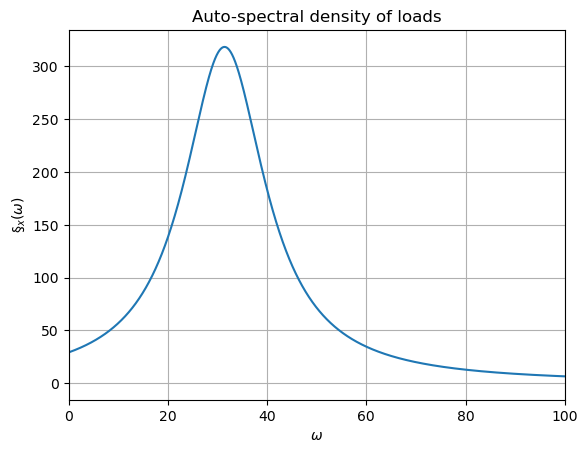

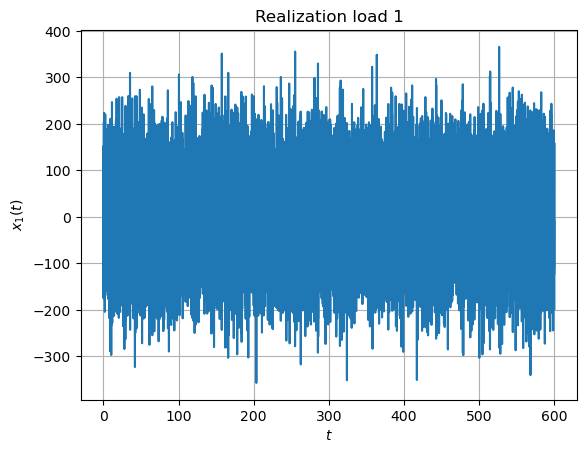

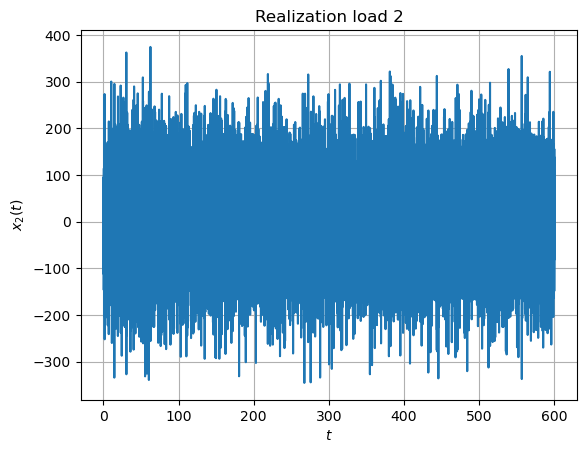

In [22]:
w = np.linspace(0,50*2*np.pi,10000000)
alpha0 = 10.0
w0 =  5*2*np.pi
S_x = 10000/np.pi*alpha0/(alpha0**2+(w-w0)**2)
plt.figure()
plt.plot(w,S_x)
plt.xlim([0,100])
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$\S_x(\omega)$")
plt.title("Auto-spectral density of loads")

domega = w[1]-w[0]
tifft = np.linspace(0,2*np.pi/domega,w.shape[0]) # time axis

phi_x1 = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
c_x1 = (2*S_x*domega)**0.5*np.exp(1j*phi_x1) # The complex amplitude including the phase angle
x1 = np.real(np.fft.ifft(c_x1)*w.shape[0]) # The ifft

phi_x2 = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
c_x2 = (2*S_x*domega)**0.5*np.exp(1j*phi_x2) # The complex amplitude including the phase angle
x2 = np.real(np.fft.ifft(c_x2)*w.shape[0]) # The ifft

t = tifft[tifft<600]
x1 = x1[tifft<600]
x2 = x2[tifft<600]

ti = np.linspace(0,600,60000)
x1 = np.interp(ti,t,x1)
x2 = np.interp(ti,t,x2)
t = np.copy(ti)


plt.figure()
plt.plot(t,x1)
plt.ylabel(r'$x_1(t)$')
plt.xlabel(r'$t$')
plt.title("Realization load 1")
plt.grid()


plt.figure()
plt.plot(t,x2)
plt.ylabel(r'$x_2(t)$')
plt.xlabel(r'$t$')
plt.title("Realization load 2")
plt.grid()


c) Use Newmark integration to obtain the dynamic response of the truss. Plot time series of the axial force in the two diagonals in the middle of the truss. Also, calculate the standard deviation and the correlation coefficient of the axial force in the two diagonals. Are the results as expected? Please explain.

#### Solution

We have to introduce the loads in the correct degrees of freedom. The drawing of the truss shows that the loads are introduced in the vertical degree of freedom in nodes three and five. This corresponds to degrees of freedom 6 and 10. Please also notice that some degrees of freedom have been removed since we introduced boundary conditions.  

Text(0.5, 1.0, 'Vertical response in node 5')

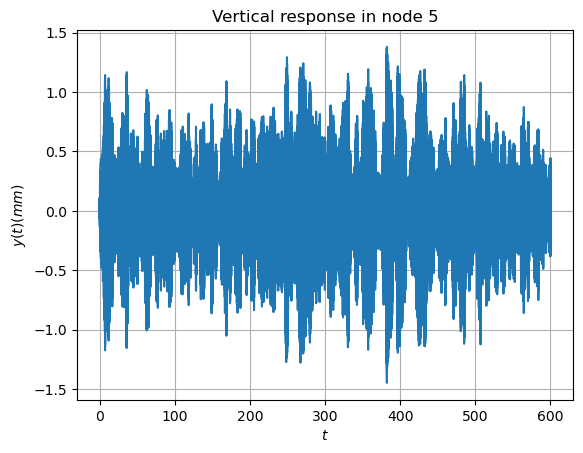

In [23]:
load = np.zeros((nodes.shape[0]*2,len(t)))
load[5,:] = x1 # Load in degree of freedom 6
load[9,:] = x2 # Load in degree of freedom 10

load_bc = transform.T @ load 

u0 = np.zeros((load_bc.shape[0],1))
udot0 = np.zeros((load_bc.shape[0],1))
h = t[1]-t[0]

gamma = 1/2
beta = 1/4


y_bc,_,_ = linear_newmark_krenk(mass_matrix_bc,damping_matrix_bc,stiffness_matrix_bc,load_bc,u0,udot0,h,gamma,beta)

y = transform @ y_bc

# plot vertical response in a selected node
selected_node = 5
plt.figure()
plt.plot(t,y[2*(selected_node-1)+1,:]*1000)
plt.grid()
plt.xlabel("$t$")
plt.ylabel("$y(t) (mm)$")
plt.title("Vertical response in node " + str(selected_node))



The easiest way to calculate the forces in elements 20 and 21 is to consider each element's stiffness matrix in the element's local coordinate system and multiply this with the displacements of the element nodes in local coordinates.

$$\mathbf{F}_{local} = \mathbf{k}_{local} \mathbf{y}_{local} $$

In other words, we need to obtain the stiffness matrix of the two elements in their local coordinate systems. We need to pick the calculated displacements in the nodes of these elements and transform these into the local coordinate system of each element. This is straightforward, but one needs to pay close attention to avoid picking the wrong displacements.

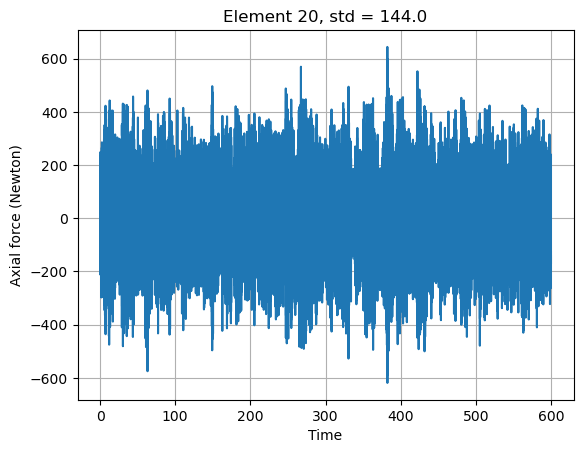

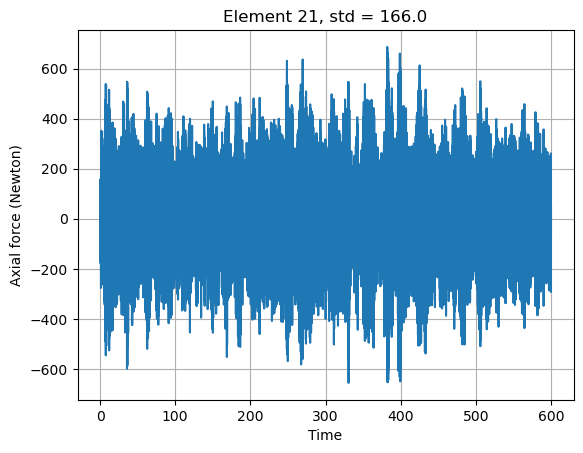

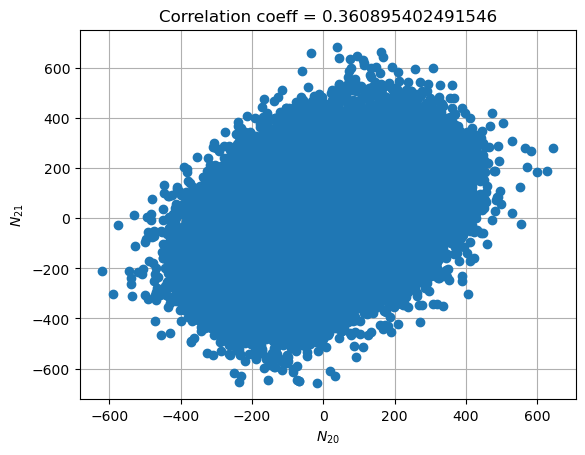

In [24]:
# Element 20
x1 = nodes[3,1::]
x2 = nodes[11,1::]
L_20 = ((x2-x1) @ (x2-x1))**0.5
e1 = (x2-x1)/L_20    
e2 = np.cross(np.array([0, 0, 1]),np.append(e1,0))
e2 = e2[0:-1]
T_glob2loc = np.vstack((e1,e2))
T_glob2loc_element_20 = spla.block_diag(T_glob2loc,T_glob2loc)
k_local_20 = E*A/L_20*np.array([[1, 0, -1, 0],[0, 0, 0, 0],[-1, 0, 1, 0],[0, 0, 0, 0]])
selected_node = 4
y_4 = y[2*(selected_node-1):2*(selected_node-1)+2]
selected_node = 12
y_12 = y[2*(selected_node-1):2*(selected_node-1)+2]
y_element_20 = np.vstack((y_4,y_12))
y_local_element_20 = T_glob2loc_element_20 @ y_element_20

F_20 = k_local_20 @ y_local_element_20

plt.figure()
plt.plot(t,F_20[0,:])
plt.grid()
plt.title("Element 20, std = " + str(np.around(np.std(F_20[0,:]))))
plt.xlabel("Time")
plt.ylabel("Axial force (Newton)")


#Element 21
x1 = nodes[11,1::]
x2 = nodes[4,1::]
L_21 = ((x2-x1) @ (x2-x1))**0.5
e1 = (x2-x1)/L_21    
e2 = np.cross(np.array([0, 0, 1]),np.append(e1,0))
e2 = e2[0:-1]
T_glob2loc = np.vstack((e1,e2))
T_glob2loc_element_21 = spla.block_diag(T_glob2loc,T_glob2loc)
k_local_21 = E*A/L_21*np.array([[1, 0, -1, 0],[0, 0, 0, 0],[-1, 0, 1, 0],[0, 0, 0, 0]])
selected_node = 12
y_12 = y[2*(selected_node-1):2*(selected_node-1)+2]
selected_node = 5
y_5 = y[2*(selected_node-1):2*(selected_node-1)+2]
y_element_21 = np.vstack((y_12,y_5))
y_local_element_21 = T_glob2loc_element_21 @ y_element_21

F_21 = k_local_21 @ y_local_element_21

plt.figure()
plt.plot(t,F_21[0,:])
plt.grid()
plt.title("Element 21, std = " + str(np.around(np.std(F_21[0,:]))))
plt.xlabel("Time")
plt.ylabel("Axial force (Newton)")

plt.figure()
plt.plot(F_20[0,:],F_21[0,:],"o")
plt.grid()
plt.xlabel("$N_{20}$")
plt.ylabel("$N_{21}$")
plt.title("Correlation coeff = " + str(np.corrcoef(np.vstack((F_20[0,:],F_21[0,:])))[0,1]));


The results above show that the standard deviation of the axial force in element 21 is slightly higher than the axial force in element 20. This is partly explained by the fact that the second action is acting more directly on element 21. It is also observed that the correlation of the axial forces in the two members is weak. This is because the truss is excited in several modes. It should also be noted that the correlation will always be perfect if it is only one mode that contributes to the response. In this case, the contribution from higher modes reduces the correlation.

d) Compute the auto- and cross-spectral density of the axial forces in the two diagonals element 20 and 21. Perform the calculations in the frequency domain and compare your results to the ones obtained in the time domain. Try to make the calculations for several realizations of the loads and observe how the results change, and describe your observations. 

#### Solution

The following relation can obtain the internal forces in the elements

$$ \mathbf{F}(t) = \left[ \begin{array}{c}  \mathbf{k}_{20,local} \mathbf{T}_{G2L,20} & \mathbf{0} \\ \mathbf{0} & \mathbf{k}_{21,local} \mathbf{T}_{G2L,21}   \end{array} \right] \mathbf{y}_{4,12,5}(t) $$

$$ \mathbf{F}(t) =  \mathbf{T}_{y2F}  \mathbf{y}_{4,12,5}(t) $$

This is the same as the calculations performed in the solution of the previous problem but in matrix notation, which is more convenient when obtaining the expression for the cross-spectral density matrix of the internal forces in the members.

The cross-correlation matrix is obtained by

$$\mathbf{R_F}(\tau) = E \left[\mathbf{F}(t) \mathbf{F}^\text{T}(t+\tau)  \right]  $$

$$\mathbf{R_F}(\tau) = E \left[\mathbf{T}_{y2F}  \mathbf{y}_{4,12,5}(t)   \mathbf{y}^\text{T}_{4,12,5}(t+\tau) \mathbf{T}^\text{T}_{y2F}  \right]  $$

$$\mathbf{R_F}(\tau) = \mathbf{T}_{y2F} E \left[  \mathbf{y}_{4,12,5}(t)   \mathbf{y}^\text{T}_{4,12,5}(t+\tau)  \right] \mathbf{T}^\text{T}_{y2F}  $$

$$\mathbf{R_F}(\tau) = \mathbf{T}_{y2F}  \mathbf{R_y}_{4,12,5}(\tau)   \mathbf{T}^\text{T}_{y2F}  $$

The cross-spectral density matrix is obtained by taking the Fourier transform of the cross-correlation matrix.

$$\mathbf{S_F}(\omega) = \mathbf{T}_{y2F}  \mathbf{S_y}_{4,12,5}(\omega)   \mathbf{T}^\text{T}_{y2F}  $$




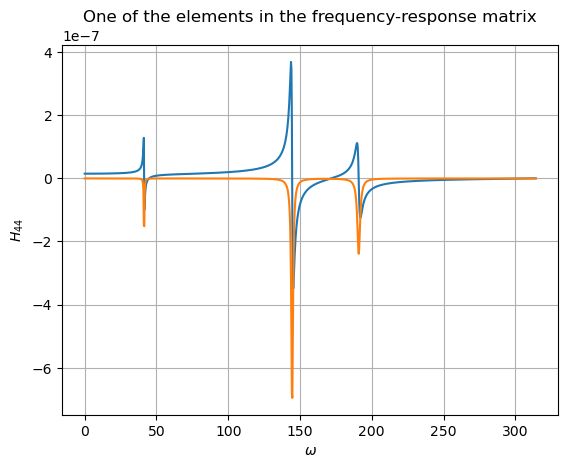

In [25]:
w = np.linspace(0,50*2*np.pi,1000)

# Frequency response matrix
H = np.zeros((stiffness_matrix_bc.shape[0],stiffness_matrix_bc.shape[1],len(w)),dtype=complex)
for k in range(len(w)):    
    H[:,:,k] = np.linalg.inv(-w[k]**2*mass_matrix_bc + 1j*w[k]*damping_matrix_bc + stiffness_matrix_bc)
    
k1=4
k2 = 4
plt.figure()
plt.plot(w,np.real(H[k1,k2,:]),label = "Re")
plt.plot(w,np.imag(H[k1,k2,:]),label = "Im")
plt.grid()

plt.xlabel("$\omega$")
plt.ylabel("$H_{" + str(k1) + str(k2) + "}$")
plt.title("One of the elements in the frequency-response matrix");


In [26]:
# cross spectral densities of the loads
S_xx = np.zeros((stiffness_matrix.shape[0],stiffness_matrix.shape[1],len(w)))

S_x = 10000/np.pi*alpha0/(alpha0**2+(w-w0)**2)

selected_node = 3
S_xx[2*(selected_node-1)+1,2*(selected_node-1)+1,:] = S_x

selected_node = 5
S_xx[2*(selected_node-1)+1,2*(selected_node-1)+1,:] = S_x

# remove constrained degrees of freedom

S_xx_bc = np.zeros((stiffness_matrix_bc.shape[0],stiffness_matrix_bc.shape[1],len(w)))

for k in range(len(w)):
    S_xx_bc[:,:,k] = transform.T @ S_xx[:,:,k] @ transform
               


0.0009298341237291166


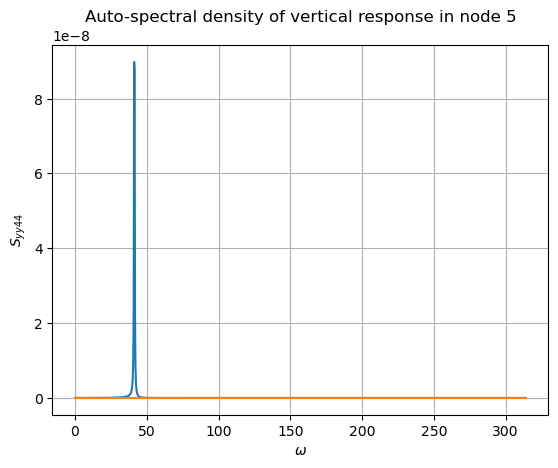

In [27]:
#cross-spectral density of the response
S_yy_bc = np.zeros((H.shape),dtype="complex")
for k in range(len(w)):
    S_yy_bc[:,:,k] = np.conj(H[:,:,k].T) @ S_xx_bc[:,:,k] @  H[:,:,k]
    
selected_node = 5
plt.figure()
plt.plot(w,np.real(S_yy_bc[2*(selected_node-1)+1,2*(selected_node-1)+1,:]),label = "Re")
plt.plot(w,np.imag(S_yy_bc[2*(selected_node-1)+1,2*(selected_node-1)+1,:]),label = "Im")
plt.grid()

plt.xlabel("$\omega$")
plt.ylabel("$S_{yy" + str(k1) + str(k2) + "}$")
plt.title("Auto-spectral density of vertical response in node " + str(selected_node));
print(np.trapz(np.real(S_yy_bc[2*(selected_node-1)+1,2*(selected_node-1)+1,:])**0.5,w))

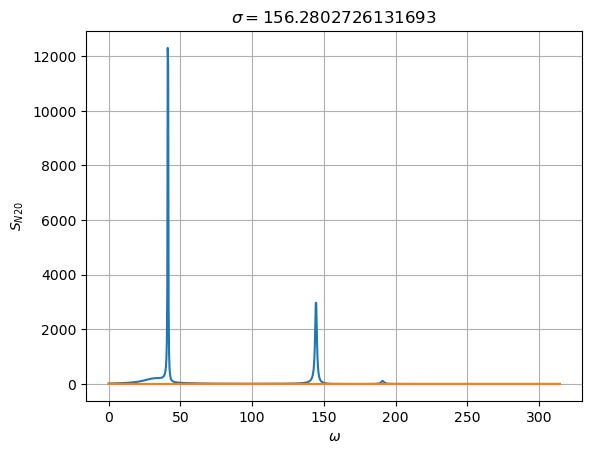

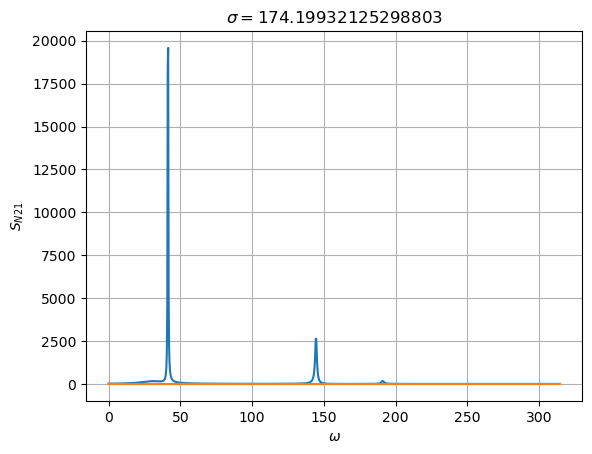

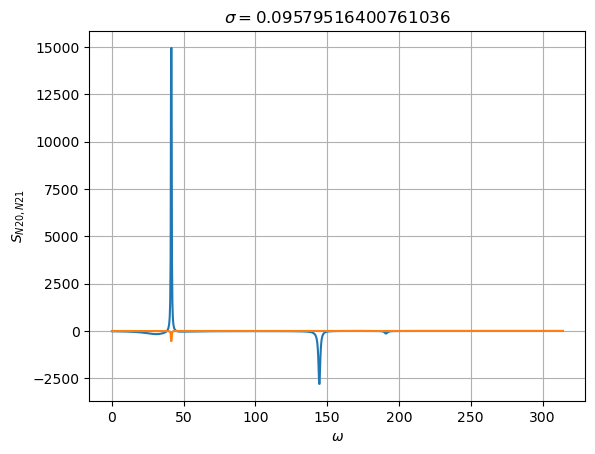

In [28]:
#cross-spectral density of the internal forces
S_yy = np.zeros((stiffness_matrix.shape[0], stiffness_matrix.shape[1],len(w)),dtype="complex")
for k in range(len(w)):
    S_yy[:,:,k] = transform @ S_yy_bc[:,:,k] @ transform.T

selected_dofs = np.array([2*(4-1),2*(4-1)+1,2*(12-1),2*(12-1)+1,2*(5-1),2*(5-1)+1])


Ty2F = np.zeros((8,6))
Ty2F[0:4,0:4] = k_local_20 @ T_glob2loc_element_20
Ty2F[4::,2::] = k_local_21 @ T_glob2loc_element_21

S_F = np.zeros((8,8,len(w)),dtype=complex)

for k in range(len(w)):
    S_F[:,:,k] = Ty2F @ S_yy[selected_dofs,:][:,selected_dofs][:,:,k] @ Ty2F.T
    
plt.figure()
plt.plot(w,np.real(S_F[0,0,:]))
plt.plot(w,np.imag(S_F[0,0,:]))
plt.xlabel("$\omega$")
plt.ylabel("$S_{N20}$")
plt.grid()
plt.title("$\sigma = $" + str(np.real(np.trapz(S_F[0,0],w)**0.5)))

plt.figure()
plt.plot(w,np.real(S_F[4,4,:]))
plt.plot(w,np.imag(S_F[4,4,:]))
plt.xlabel("$\omega$")
plt.ylabel("$S_{N21}$")
plt.grid()
plt.title("$\sigma = $" + str(np.real(np.trapz(S_F[4,4],w)**0.5)))


plt.figure()
plt.plot(w,np.real(S_F[0,4,:]))
plt.plot(w,np.imag(S_F[0,4,:]))
plt.xlabel("$\omega$")
plt.ylabel("$S_{N20,N21}$")
plt.grid()
plt.title("$\sigma = $" + str(np.real(np.trapz(S_F[0,4],w)/np.trapz(S_F[0,0],w)**0.5/np.trapz(S_F[4,4],w)**0.5)));


The three figures show the auto-spectral density of the axial force in the two members and their cross-spectral density. The standard deviation and covariance coefficient are also given. It is observed that the time domain results are not perfectly equal to the time domain results. This is because the time domain results are only estimates of the statistical properties of the response process, and the average of many realizations needs to be considered to obtain accurate results. If we calculate the response ten times in the time domain, the average statistical properties correspond very well to the frequency domain results. It is also interesting to observe that the first mode contributes to positive covariance, while the second mode contributes to reducing the covariance of the forces in the two members. This is what typically happens in systems with several degrees of freedom.

